In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import resample, shuffle
from sklearn.compose import ColumnTransformer

In [2]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import joblib
from sklearn.metrics import recall_score , precision_score , f1_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h3>There are no nan values in the dataset</h3>

In [7]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


<h3>There are 240 duplicate values in the dataset</h3>

In [11]:
df['quality']=np.where(df['quality']>6,1,0)
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

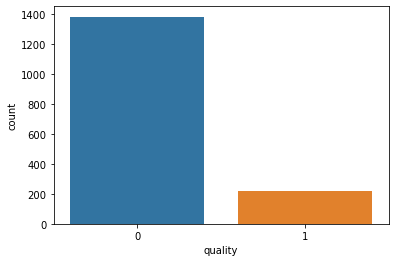

In [12]:
sns.countplot(df['quality'])

# Data Preprocessing

In [13]:
# dropping the duplicate values

df = df.drop_duplicates()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [14]:
df.shape

(1359, 12)

In [15]:
df.duplicated().sum()

0

<h3> After dropping duplicate values now we have 1356 rows  </h3>

In [16]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Checking Distribution

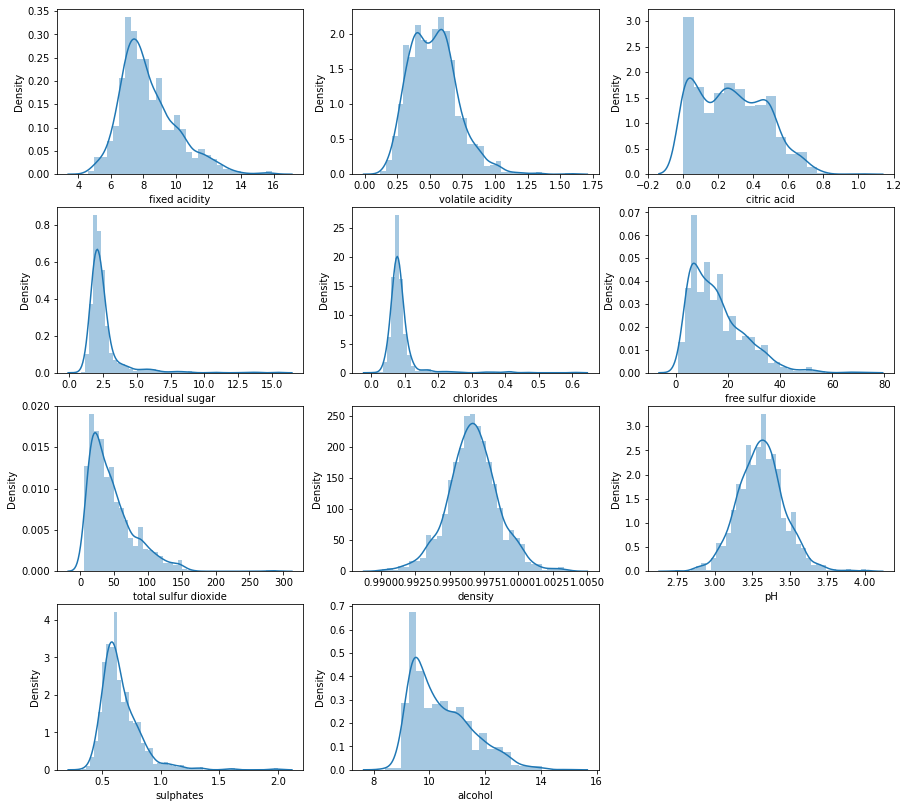

In [17]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()[0:-1]):
    plt.subplot(4,3,index+1)
    sns.distplot(df[colum])
    plt.xlabel(colum)
plt.show()

# Checking Outliers

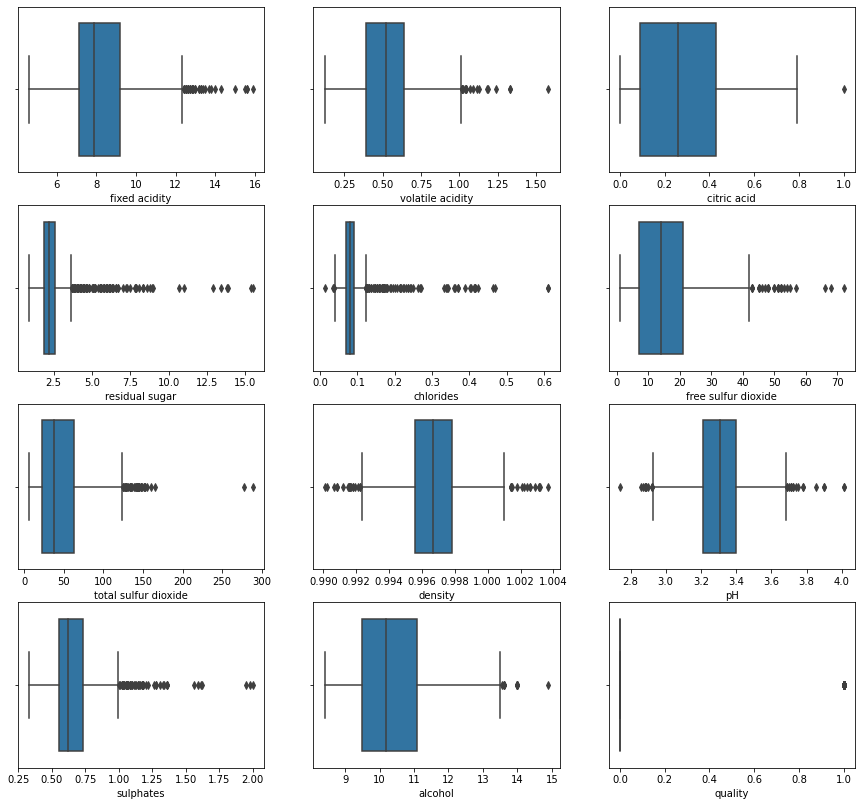

In [18]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()):
    plt.subplot(4,3,index+1)
    sns.boxplot(df[colum])
    plt.xlabel(colum)
plt.show()

- density,pH,quality has normal distribution and rest of the column has left skewed distribution

In [19]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 2.133662
dtype: float64

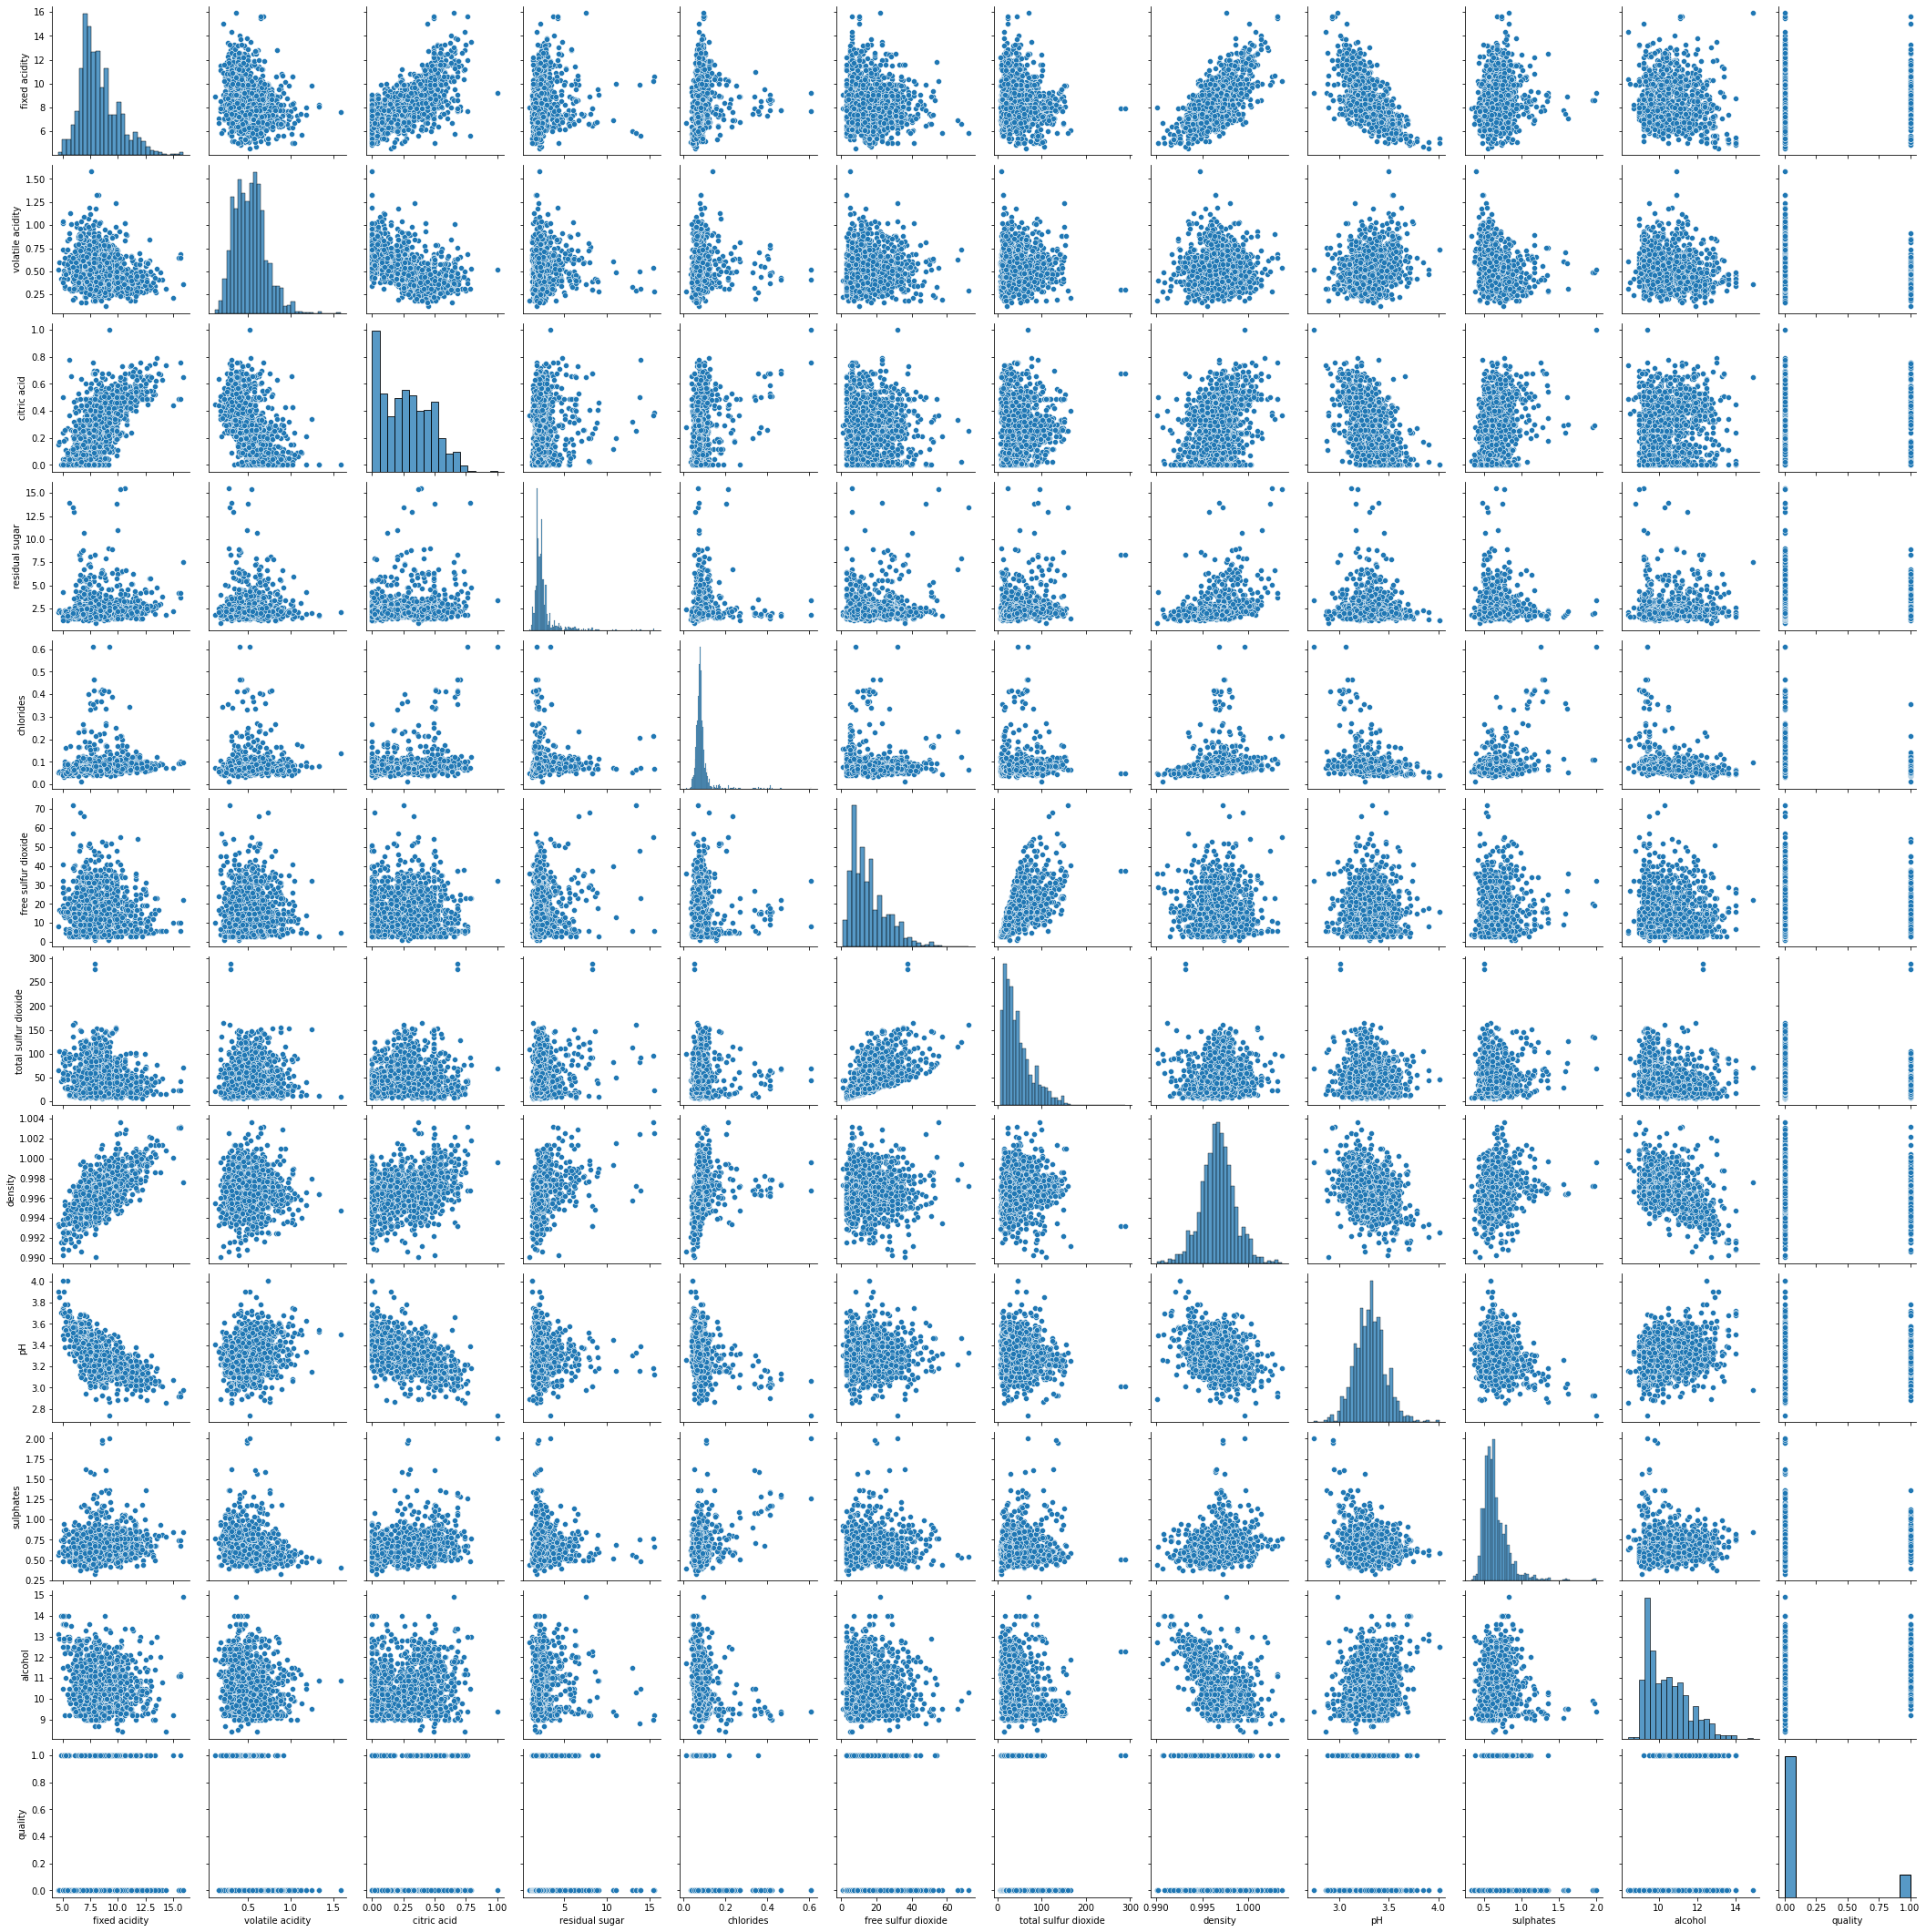

In [21]:
sns.pairplot(df)

# Removing outliers

In [22]:
# These all columns has left skewness hence removing outliers using IQR 

outliers_column=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

In [23]:
for i in outliers_column:
    Q3 = df[i].quantile(0.75)
    Q1 = df[i].quantile(0.25)
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5 * IQR 
    lower_limit = Q1 - 1.5 * IQR
    (df[(df[i]>upper_limit) | (df[i]<lower_limit)])
    df[i] = np.where(df[i] > upper_limit , upper_limit ,np.where(df[i] < lower_limit , lower_limit , df[i]))

In [24]:
# These all columns has normal distribution hence removing outliers using winsorization

In [25]:
outliers_columns=['density','pH','quality']
for column in outliers_columns:
    upper_limit = df[column].quantile(.99)
    lower_limit = df[column].quantile(.01)
    df[column] = np.where( df[column] >= upper_limit , upper_limit , np.where(df[column] <= lower_limit,lower_limit , df[column]))

In [26]:
# After removing outliers

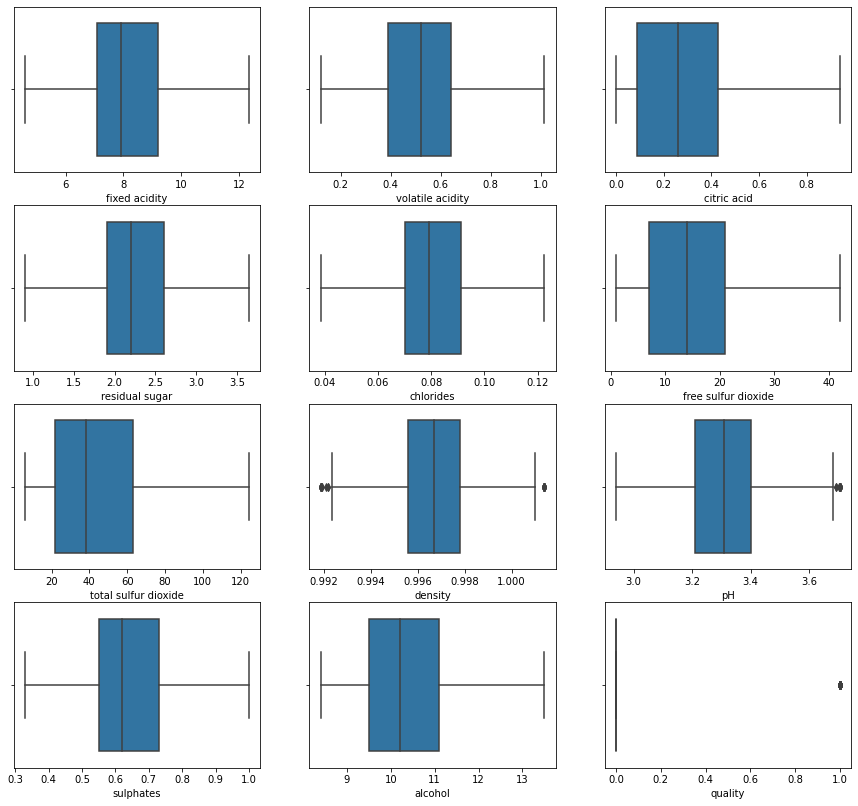

In [27]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()):
    plt.subplot(4,3,index+1)
    sns.boxplot(df[colum])
    plt.xlabel(colum)
plt.show()

In [28]:
# Distribution after removing outliers

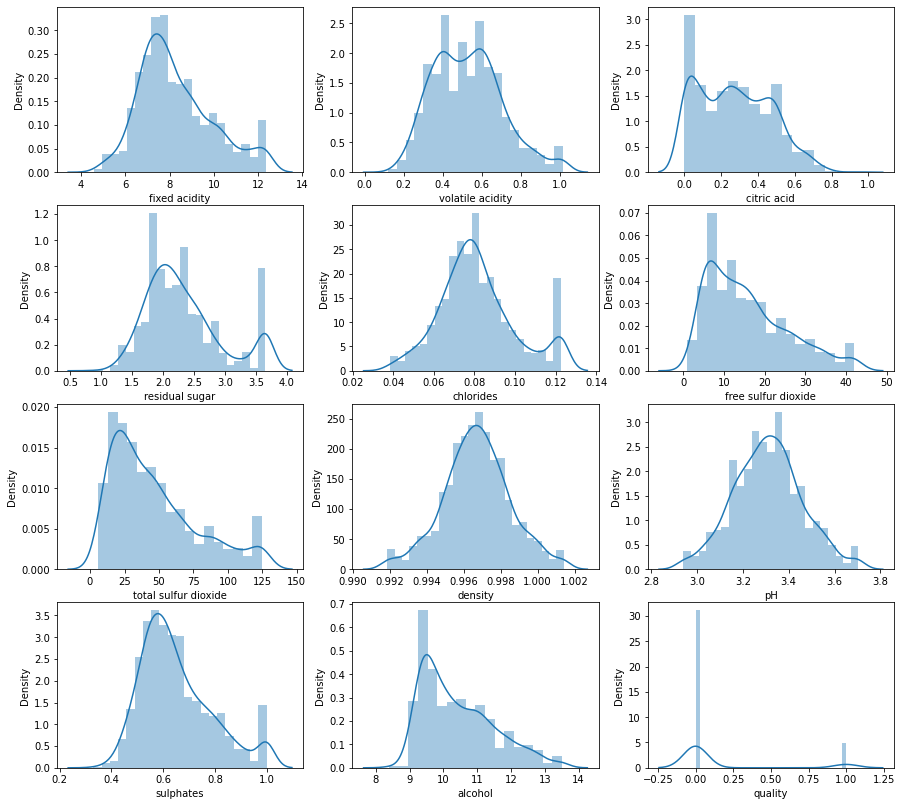

In [29]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(df.keys()):
    plt.subplot(4,3,index+1)
    sns.distplot(df[colum])
    plt.xlabel(colum)
plt.show()

In [30]:
# skewness Before transformation 
df.skew()

fixed acidity           0.675403
volatile acidity        0.459872
citric acid             0.305494
residual sugar          0.832523
chlorides               0.488127
free sulfur dioxide     0.855497
total sulfur dioxide    0.977264
density                -0.004156
pH                      0.106508
sulphates               0.817944
alcohol                 0.793652
quality                 2.133662
dtype: float64

# Removing skewness

In [31]:
to_transform = [ 'fixed acidity' , 'residual sugar' ,'free sulfur dioxide' , 'total sulfur dioxide','sulphates','alcohol'] 

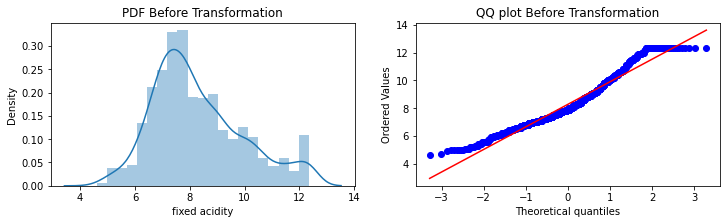

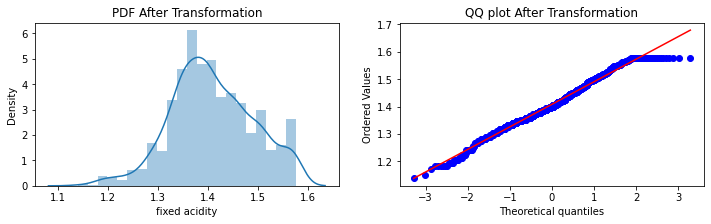

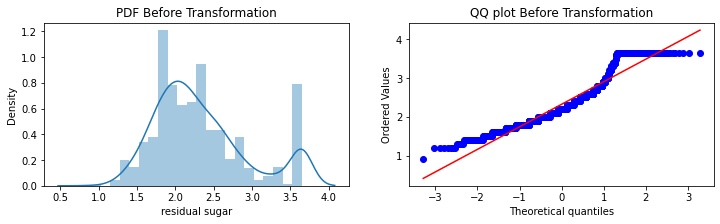

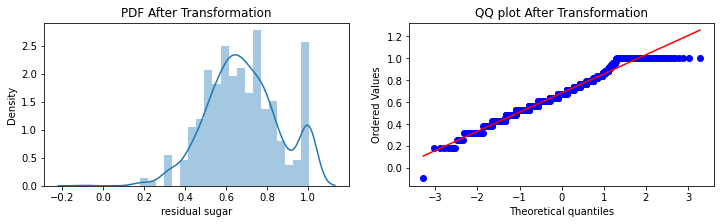

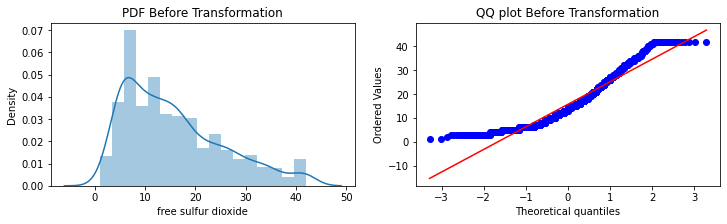

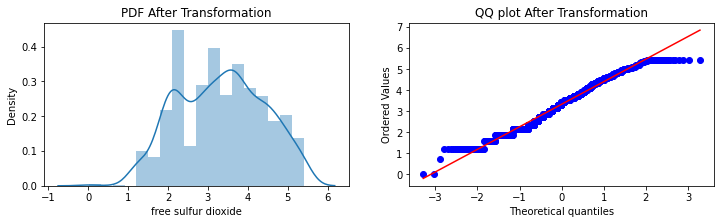

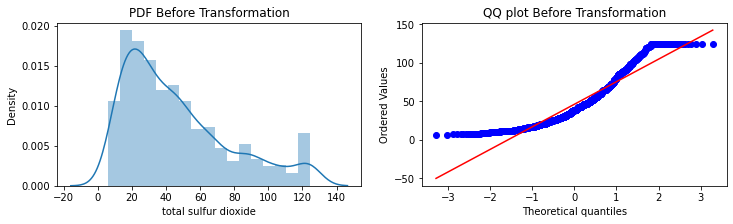

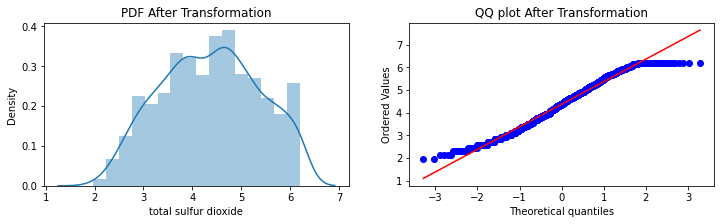

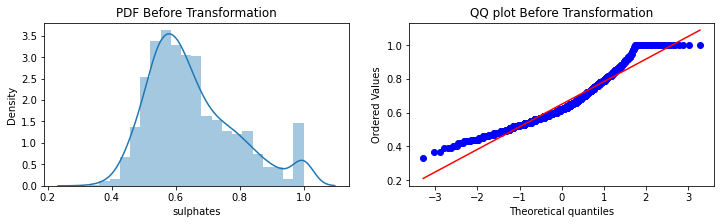

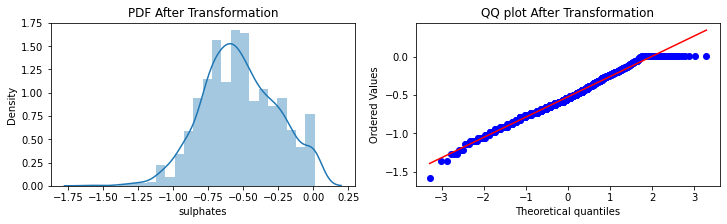

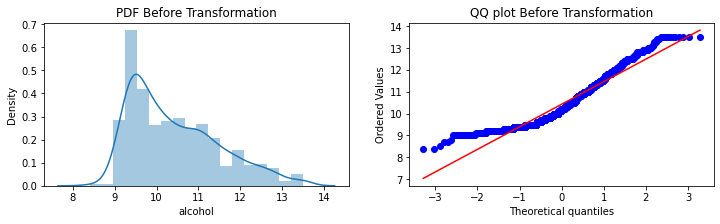

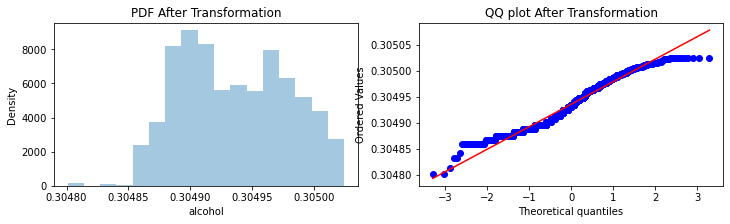

In [32]:
for i, j in enumerate(to_transform):
    plt.figure(figsize=(12,3))
    plt.subplot(2,3,i+1)
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF Before Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot Before Transformation')
    df[j],params = stats.boxcox(df[j]+0.01)
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF After Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot After Transformation')
    plt.show()

In [33]:
# skewness After transformation 
df.skew()

fixed acidity           0.005752
volatile acidity        0.459872
citric acid             0.305494
residual sugar          0.006284
chlorides               0.488127
free sulfur dioxide    -0.033468
total sulfur dioxide   -0.019596
density                -0.004156
pH                      0.106508
sulphates               0.012371
alcohol                 0.113123
quality                 2.133662
dtype: float64

In [34]:
# converting datatype from float to int
df['quality']=df['quality'].astype('int')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 132.7 KB


In [36]:
#splitting into attributes and target
x = df[df['quality']==0]
y = df[df['quality']==1]

#data balancing
upsampled = resample(y, replace=True, n_samples=x.shape[0])
df_new = pd.concat([x, upsampled])
df_new =shuffle(df_new)

In [37]:
df_new['quality'].value_counts()

1    1175
0    1175
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

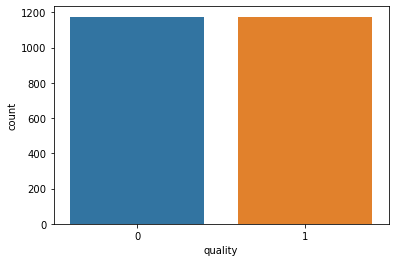

In [38]:
sns.countplot(df_new['quality'])

Now data is balanced

# Seperating X and y 

In [39]:
X=df_new.iloc[:,:-1]
y =df_new.iloc[:,-1]

In [40]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
81,1.393978,0.43,0.70,0.567654,0.1225,4.188336,5.225711,0.997400,3.13,0.009917,0.304888
395,1.565413,0.37,0.76,1.003777,0.0660,2.350173,4.386729,1.000400,3.22,-0.587045,0.305017
505,1.504218,0.49,0.63,0.863215,0.0720,2.880852,3.851332,0.996800,3.16,-0.255571,0.305007
1433,1.281905,0.40,0.16,0.526058,0.0690,3.028798,3.797150,0.995500,3.42,-0.317605,0.304929
1157,1.192988,0.51,0.18,0.642281,0.0420,3.636824,5.863286,0.992400,3.46,-0.133528,0.305015
...,...,...,...,...,...,...,...,...,...,...,...
1165,1.430605,0.44,0.50,0.567654,0.1225,3.529019,4.386729,0.996340,3.01,0.009917,0.304888
444,1.212636,0.57,0.01,0.481078,0.0540,1.881235,3.903670,0.993400,3.57,-0.171796,0.305007
1228,1.192988,0.42,0.00,0.526058,0.0440,3.836971,5.646323,0.991872,3.68,-0.333988,0.305025
759,1.445031,0.42,0.21,0.765232,0.0920,4.939994,5.646323,0.998230,3.19,-0.793146,0.304874


In [41]:
y

81      0
395     1
505     1
1433    1
1157    1
       ..
1165    0
444     1
1228    1
759     0
456     0
Name: quality, Length: 2350, dtype: int32

In [ ]:
# Performing standard scaler

In [42]:
step1 = ColumnTransformer([
    ('standardscaler',StandardScaler(), slice(0,X.shape[1]+1))
     ],remainder='passthrough')

X=step1.fit_transform(X)

In [43]:
X

array([[-0.25929564, -0.27933069,  1.92431289, ..., -1.1241532 ,
         1.76204283, -1.45512383],
       [ 1.65333862, -0.62437977,  2.22318178, ..., -0.5268054 ,
        -0.54148604,  1.4202987 ],
       [ 0.97061493,  0.06571839,  1.57563253, ..., -0.92503727,
         0.73759046,  1.21193986],
       ...,
       [-2.50165926, -0.33683887, -1.56249077, ...,  2.52630557,
         0.4349984 ,  1.5970478 ],
       [ 0.31027991, -0.33683887, -0.51644967, ..., -0.72592133,
        -1.33677622, -1.77579891],
       [ 0.36222461,  0.64080019,  0.38015698, ...,  0.46877426,
        -0.72328675, -0.31785608]])

# Model Selection

# Logistic Regression

In [44]:
lr = LogisticRegression()

In [45]:
# selecting best random state
for randomstate in range(0,1000):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=randomstate)
    lr.fit(X_train,y_train)
    training_pred = lr.predict(X_train)
    testing_pred  =  lr.predict(X_test)
    if round(accuracy_score(y_train , training_pred)*100 , 1) == round(accuracy_score(y_test , testing_pred)*100 , 1):
        print('At random state ',randomstate,' the model perform very well')
        print('At random state ',randomstate)
        print('Training score',accuracy_score(y_train,training_pred)*100)
        print('testing score', accuracy_score(y_test,testing_pred)*100)
        print()

At random state  103  the model perform very well
At random state  103
Training score 79.90919409761634
testing score 79.93197278911565

At random state  152  the model perform very well
At random state  152
Training score 80.36322360953461
testing score 80.4421768707483

At random state  162  the model perform very well
At random state  162
Training score 80.59023836549376
testing score 80.61224489795919

At random state  168  the model perform very well
At random state  168
Training score 80.30646992054483
testing score 80.27210884353741

At random state  171  the model perform very well
At random state  171
Training score 80.4199772985244
testing score 80.4421768707483

At random state  228  the model perform very well
At random state  228
Training score 80.64699205448355
testing score 80.61224489795919

At random state  247  the model perform very well
At random state  247
Training score 80.98751418842225
testing score 80.95238095238095

At random state  380  the model perform very

In [46]:
predlr = lr.predict(X_test)
lss = accuracy_score(y_test ,predlr )
for cv in range(2,10):
    lsscore = cross_val_score(lr , X , y , cv=cv)
    lsc = lsscore.mean()
    print('At cv ',cv)
    print('cross validation score is :',lsc*100)
    print('accuracy score is :',lss*100)
    print()

At cv  2
cross validation score is : 80.12765957446808
accuracy score is : 81.12244897959184

At cv  3
cross validation score is : 80.0848276730871
accuracy score is : 81.12244897959184

At cv  4
cross validation score is : 80.17063298914114
accuracy score is : 81.12244897959184

At cv  5
cross validation score is : 80.0
accuracy score is : 81.12244897959184

At cv  6
cross validation score is : 80.34028828922874
accuracy score is : 81.12244897959184

At cv  7
cross validation score is : 80.42517006802721
accuracy score is : 81.12244897959184

At cv  8
cross validation score is : 80.3404552947459
accuracy score is : 81.12244897959184

At cv  9
cross validation score is : 80.5103032311947
accuracy score is : 81.12244897959184



# KNearestNeighbour

In [47]:
Knn = KNeighborsClassifier()

In [48]:
# selecting best random state
for randomstate in range(0,1000):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=randomstate)
    Knn.fit(X_train,y_train)
    training_pred = Knn.predict(X_train)
    testing_pred  =  Knn.predict(X_test)
    if round(accuracy_score(y_train , training_pred)*100 , 1) == round(accuracy_score(y_test , testing_pred)*100 , 1):
        print('At random state ',randomstate,' the model perform very well')
        print('At random state ',randomstate)
        print('Training score',accuracy_score(y_train,training_pred)*100)
        print('testing score', accuracy_score(y_test,testing_pred)*100)
        print()

In [49]:
predlr = Knn.predict(X_test)
lss = accuracy_score(y_test ,predlr )
for cv in range(2,10):
    lsscore = cross_val_score(Knn , X , y , cv=cv)
    lsc = lsscore.mean()

    print('At cv ',cv)
    print('cross validation score is :',lsc*100)
    print('accuracy score is :',lss*100)
    print()

At cv  2
cross validation score is : 83.87234042553192
accuracy score is : 84.01360544217688

At cv  3
cross validation score is : 85.99957863094151
accuracy score is : 84.01360544217688

At cv  4
cross validation score is : 86.50936098459827
accuracy score is : 84.01360544217688

At cv  5
cross validation score is : 86.97872340425532
accuracy score is : 84.01360544217688

At cv  6
cross validation score is : 87.1907458635628
accuracy score is : 84.01360544217688

At cv  7
cross validation score is : 87.61587470809219
accuracy score is : 84.01360544217688

At cv  8
cross validation score is : 87.70141162266954
accuracy score is : 84.01360544217688

At cv  9
cross validation score is : 88.08409620465424
accuracy score is : 84.01360544217688



# Decission Tree

In [50]:
dt = DecisionTreeClassifier()

In [51]:
# selecting best random state
for randomstate in range(0,50):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=randomstate)
    dt.fit(X_train,y_train)
    training_pred = dt.predict(X_train)
    testing_pred  =  dt.predict(X_test)
    print('At random state ',randomstate,' the model perform very well')
    print('At random state ',randomstate)
    print('Training score',accuracy_score(y_train,training_pred)*100)
    print('testing score', accuracy_score(y_test,testing_pred)*100)
    print()


At random state  0  the model perform very well
At random state  0
Training score 100.0
testing score 94.38775510204081

At random state  1  the model perform very well
At random state  1
Training score 100.0
testing score 93.02721088435374

At random state  2  the model perform very well
At random state  2
Training score 100.0
testing score 93.70748299319727

At random state  3  the model perform very well
At random state  3
Training score 100.0
testing score 92.17687074829932

At random state  4  the model perform very well
At random state  4
Training score 100.0
testing score 93.5374149659864

At random state  5  the model perform very well
At random state  5
Training score 100.0
testing score 93.70748299319727

At random state  6  the model perform very well
At random state  6
Training score 100.0
testing score 94.72789115646259

At random state  7  the model perform very well
At random state  7
Training score 100.0
testing score 93.5374149659864

At random state  8  the model perf

In [52]:
predlr = dt.predict(X_test)
lss = accuracy_score(y_test ,predlr )
for cv in range(2,10):
    lsscore = cross_val_score(dt , X , y , cv=cv)
    lsc = lsscore.mean()

    print('At cv ',cv)
    print('cross validation score is :',lsc*100)
    print('accuracy score is :',lss*100)
    print()

At cv  2
cross validation score is : 91.7872340425532
accuracy score is : 95.23809523809523

At cv  3
cross validation score is : 94.08552054282762
accuracy score is : 95.23809523809523

At cv  4
cross validation score is : 94.46822596159417
accuracy score is : 95.23809523809523

At cv  5
cross validation score is : 95.1063829787234
accuracy score is : 95.23809523809523

At cv  6
cross validation score is : 95.31910590323086
accuracy score is : 95.23809523809523

At cv  7
cross validation score is : 95.36171184891867
accuracy score is : 95.23809523809523

At cv  8
cross validation score is : 95.10662626825474
accuracy score is : 95.23809523809523

At cv  9
cross validation score is : 95.23445091138343
accuracy score is : 95.23809523809523



# RandomForestClassifier

In [53]:
RFC = RandomForestClassifier()

In [54]:
# selecting best random state
for randomstate in range(11,20):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=randomstate)
    RFC.fit(X_train,y_train)
    training_pred = RFC.predict(X_train)
    testing_pred  =  RFC.predict(X_test)
    print('At random state ',randomstate,' the model perform very well')
    print('At random state ',randomstate)
    print('Training score',accuracy_score(y_train,training_pred)*100)
    print('testing score', accuracy_score(y_test,testing_pred)*100)
    print()


At random state  11  the model perform very well
At random state  11
Training score 100.0
testing score 96.42857142857143

At random state  12  the model perform very well
At random state  12
Training score 100.0
testing score 95.91836734693877

At random state  13  the model perform very well
At random state  13
Training score 100.0
testing score 97.27891156462584

At random state  14  the model perform very well
At random state  14
Training score 100.0
testing score 95.40816326530613

At random state  15  the model perform very well
At random state  15
Training score 100.0
testing score 95.06802721088435

At random state  16  the model perform very well
At random state  16
Training score 100.0
testing score 96.25850340136054

At random state  17  the model perform very well
At random state  17
Training score 100.0
testing score 96.08843537414967

At random state  18  the model perform very well
At random state  18
Training score 100.0
testing score 95.74829931972789

At random state 

In [55]:
predlr = RFC.predict(X_test)
lss = accuracy_score(y_test ,predlr )
for cv in range(2,10):
    lsscore = cross_val_score(RFC , X , y , cv=cv)
    lsc = lsscore.mean()

    print('At cv ',cv)
    print('cross validation score is :',lsc*100)
    print('accuracy score is :',lss*100)
    print()

At cv  2
cross validation score is : 93.53191489361703
accuracy score is : 95.91836734693877

At cv  3
cross validation score is : 95.48928766909061
accuracy score is : 95.91836734693877

At cv  4
cross validation score is : 95.61690945543464
accuracy score is : 95.91836734693877

At cv  5
cross validation score is : 96.0
accuracy score is : 95.91836734693877

At cv  6
cross validation score is : 96.12725524992605
accuracy score is : 95.91836734693877

At cv  7
cross validation score is : 96.38212001218398
accuracy score is : 95.91836734693877

At cv  8
cross validation score is : 96.4255241345685
accuracy score is : 95.91836734693877

At cv  9
cross validation score is : 96.46788141128756
accuracy score is : 95.91836734693877



# GaussianNB

In [56]:
Gnb = GaussianNB()

In [57]:
# selecting best random state
for randomstate in range(0,1000):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=randomstate)
    Gnb.fit(X_train,y_train)
    training_pred = Gnb.predict(X_train)
    testing_pred  =  Gnb.predict(X_test)
    if round(accuracy_score(y_train , training_pred)*100 , 1) == round(accuracy_score(y_test , testing_pred)*100,1):
        print('At random state ',randomstate,' the model perform very well')
        print('At random state ',randomstate)
        print('Training score',accuracy_score(y_train,training_pred)*100)
        print('testing score', accuracy_score(y_test,testing_pred)*100)
        print()


At random state  6  the model perform very well
At random state  6
Training score 80.30646992054483
testing score 80.27210884353741

At random state  58  the model perform very well
At random state  58
Training score 79.62542565266743
testing score 79.59183673469387

At random state  122  the model perform very well
At random state  122
Training score 79.3416572077185
testing score 79.25170068027211

At random state  123  the model perform very well
At random state  123
Training score 79.90919409761634
testing score 79.93197278911565

At random state  131  the model perform very well
At random state  131
Training score 80.36322360953461
testing score 80.4421768707483

At random state  158  the model perform very well
At random state  158
Training score 79.39841089670828
testing score 79.421768707483

At random state  180  the model perform very well
At random state  180
Training score 79.28490351872873
testing score 79.25170068027211

At random state  286  the model perform very well
A

In [58]:
predlr = Gnb.predict(X_test)
lss = accuracy_score(y_test ,predlr )
for cv in range(2,10):
    lsscore = cross_val_score(Gnb , X , y , cv=cv)
    lsc = lsscore.mean()

    print('At cv ',cv)
    print('cross validation score is :',lsc*100)
    print('accuracy score is :',lss*100)
    print()

At cv  2
cross validation score is : 79.61702127659575
accuracy score is : 81.63265306122449

At cv  3
cross validation score is : 79.7017945109078
accuracy score is : 81.63265306122449

At cv  4
cross validation score is : 79.61733245257217
accuracy score is : 81.63265306122449

At cv  5
cross validation score is : 79.57446808510637
accuracy score is : 81.63265306122449

At cv  6
cross validation score is : 79.5326826382727
accuracy score is : 81.63265306122449

At cv  7
cross validation score is : 79.61772768809016
accuracy score is : 81.63265306122449

At cv  8
cross validation score is : 79.49011515869147
accuracy score is : 81.63265306122449

At cv  9
cross validation score is : 79.44715795904705
accuracy score is : 81.63265306122449



# XGBClassifier

In [59]:
XGB=XGBClassifier()

In [60]:
# selecting best random state
for randomstate in range(0,10):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=randomstate)
    XGB.fit(X_train,y_train)
    training_pred = XGB.predict(X_train)
    testing_pred  =  XGB.predict(X_test)
    print('At random state ',randomstate,' the model perform very well')
    print('At random state ',randomstate)
    print('Training score',accuracy_score(y_train,training_pred)*100)
    print('testing score', accuracy_score(y_test,testing_pred)*100)
    print()


[17:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state  0  the model perform very well
At random state  0
Training score 100.0
testing score 93.36734693877551

[17:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At random state  1  the model perform very well
At random state  1
Training score 100.0
testing score 96.25850340136054

[17:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the defau

In [61]:
predlr = XGB.predict(X_test)
lss = accuracy_score(y_test ,predlr )
for cv in range(2,10):
    lsscore = cross_val_score(XGB , X , y , cv=cv)
    lsc = lsscore.mean()

    print('At cv ',cv)
    print('cross validation score is :',lsc*100)
    print('accuracy score is :',lss*100)
    print()

[17:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At cv  2
cross validation score is : 94.08510638297872
accuracy score is : 94.72789115646259

[17:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to re

[17:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
At cv  7
cross validation score is : 95.82952584018682
accuracy score is : 94.72789115646259

[17:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to re

# Support vector Classifier

In [62]:
svc =SVC()

In [63]:
# selecting best random state
for randomstate in range(0,1000):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=randomstate)
    svc.fit(X_train,y_train)
    training_pred = svc.predict(X_train)
    testing_pred  =  svc.predict(X_test)
    if round(accuracy_score(y_train , training_pred)*100 , 1) == round(accuracy_score(y_test , testing_pred)*100,1):
        print('At random state ',randomstate,' the model perform very well')
        print('At random state ',randomstate)
        print('Training score',accuracy_score(y_train,training_pred)*100)
        print('testing score', accuracy_score(y_test,testing_pred)*100)
        print()

At random state  81  the model perform very well
At random state  81
Training score 89.8410896708286
testing score 89.79591836734694

At random state  98  the model perform very well
At random state  98
Training score 89.27355278093077
testing score 89.28571428571429

At random state  184  the model perform very well
At random state  184
Training score 88.93303064699205
testing score 88.94557823129252

At random state  299  the model perform very well
At random state  299
Training score 89.27355278093077
testing score 89.28571428571429

At random state  405  the model perform very well
At random state  405
Training score 88.81952326901249
testing score 88.77551020408163

At random state  424  the model perform very well
At random state  424
Training score 89.55732122587968
testing score 89.62585034013605

At random state  431  the model perform very well
At random state  431
Training score 88.36549375709421
testing score 88.43537414965986

At random state  488  the model perform very w

In [64]:
predlr = svc.predict(X_test)
lss = accuracy_score(y_test ,predlr )
for cv in range(2,10):
    lsscore = cross_val_score(svc , X , y , cv=cv)
    lsc = lsscore.mean()

    print('At cv ',cv)
    print('cross validation score is :',lsc*100)
    print('accuracy score is :',lss*100)
    print()

At cv  2
cross validation score is : 86.46808510638297
accuracy score is : 88.94557823129252

At cv  3
cross validation score is : 87.36110025108384
accuracy score is : 88.94557823129252

At cv  4
cross validation score is : 87.1910092827591
accuracy score is : 88.94557823129252

At cv  5
cross validation score is : 87.531914893617
accuracy score is : 88.94557823129252

At cv  6
cross validation score is : 87.78652765454008
accuracy score is : 88.94557823129252

At cv  7
cross validation score is : 87.48908518631333
accuracy score is : 88.94557823129252

At cv  8
cross validation score is : 87.7449443941399
accuracy score is : 88.94557823129252

At cv  9
cross validation score is : 88.0839337187499
accuracy score is : 88.94557823129252



<h3> Hence it is cleare that Random forest classifier is the best performing model at random state 11 it gives best accuracy for both training and testing dataset </h3>

# Random Forest Classifier

In [65]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=11)


In [66]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.967687074829932
[[278  19]
 [  0 291]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       297
           1       0.94      1.00      0.97       291

    accuracy                           0.97       588
   macro avg       0.97      0.97      0.97       588
weighted avg       0.97      0.97      0.97       588



# Hyperparameter Tuning

In [84]:
params = {'n_estimators': [10,100,200] ,
          'max_depth':[10,50,100,150],
        'min_weight_fraction_leaf':[0,0.1,0.01],
        'ccp_alpha':[0,0.01,0.1]     
         }

In [85]:
gridscv = GridSearchCV(rfc,param_grid=params,cv=8,scoring='accuracy',n_jobs = -1)

In [86]:
gridscv.fit(X_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.01, 0.1],
                         'max_depth': [10, 50, 100, 150],
                         'min_weight_fraction_leaf': [0, 0.1, 0.01],
                         'n_estimators': [10, 100, 200]},
             scoring='accuracy')

In [87]:
gridscv.best_params_

{'ccp_alpha': 0,
 'max_depth': 150,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 10}

These are the best parameters for the model

# Model building

In [88]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=11)

In [92]:
rfc=RandomForestClassifier(ccp_alpha= 0,max_depth= 150,min_weight_fraction_leaf= 0,n_estimators= 10)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.9642857142857143
[[278  19]
 [  2 289]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       297
           1       0.94      0.99      0.96       291

    accuracy                           0.96       588
   macro avg       0.97      0.96      0.96       588
weighted avg       0.97      0.96      0.96       588



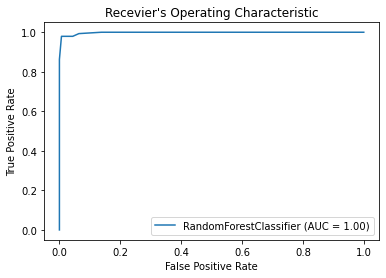

In [95]:
#AUC-ROC Curve
plot_roc_curve(rfc, X_test, y_test)
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

AUC curve score is 100 %

# saving the best model

In [97]:
import pickle

In [99]:
pickle.dump(rfc ,open('redwine.pkl','wb'))